## Import Librairies

In [59]:
#data manipulation
import pandas as pd
import numpy as np

#data visualization
import matplotlib.pyplot as plt
import seaborn as sb
import optuna.visualization as vis
import plotly

#data preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

#data selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
import optuna

#data modeling
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import xgboost as xgb

#data performance
from sklearn.metrics import  r2_score
from sklearn.metrics import mean_squared_error


## Read dataset

In [60]:
#Read house dataset
house = pd.read_csv('kc_house_data.csv')
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [61]:
#check variable types and Null values
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [62]:
#convert date data type to date and time
house['date'] = pd.to_datetime(house['date'])
type(house['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

## Select Features

<Axes: >

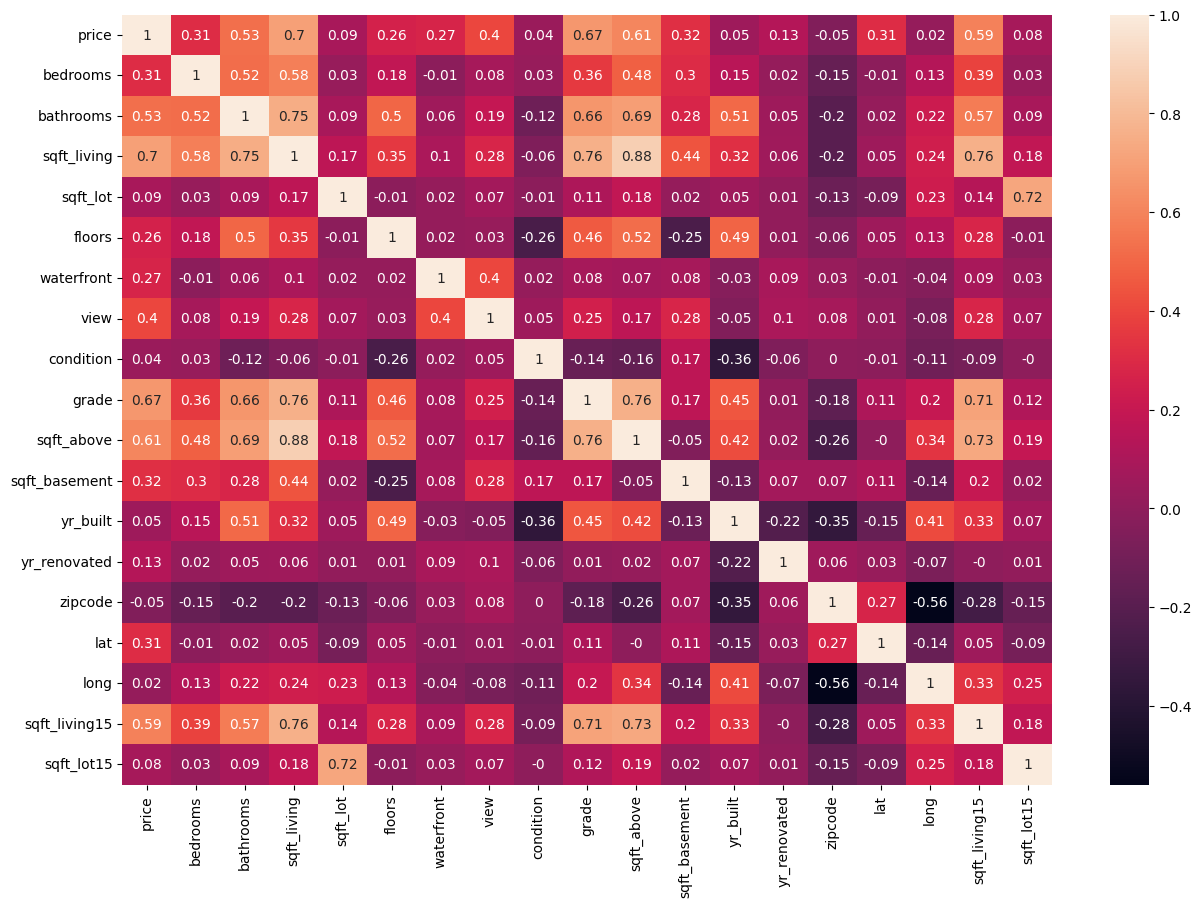

In [63]:
## Select features based on correlation
plt.figure(figsize=(15,10))
sb.heatmap(house.drop(['id', 'date'], axis=1).corr().round(2), annot=True)

In [64]:
#Choose the most correlated features above 0.5 for training.
house_corr = house.drop(['id', 'date'], axis=1).corr()

#Extract variaables having correlation >= 0.3
most_corr = house_corr[(abs(house_corr ['price'])>=0.2)]

#Output a list of important variable names.
selected_variables = most_corr.index
selected_variables = ['date'] + list(selected_variables)
selected_variables

house_df = house[selected_variables]
house_df.set_index('date', inplace=True)
house_df.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,lat,sqft_living15
date,,,,,,,,,,,,
2014-10-13,221900.0,3,1.00,1180,1.0,0,0,7,1180,0,47.5112,1340
2014-12-09,538000.0,3,2.25,2570,2.0,0,0,7,2170,400,47.7210,1690
2015-02-25,180000.0,2,1.00,770,1.0,0,0,6,770,0,47.7379,2720
2014-12-09,604000.0,4,3.00,1960,1.0,0,0,7,1050,910,47.5208,1360
2015-02-18,510000.0,3,2.00,1680,1.0,0,0,8,1680,0,47.6168,1800


## Plot price against time

#### Plot price for all available date

<Axes: title={'center': 'Price vs Date'}, xlabel='date', ylabel='Price'>

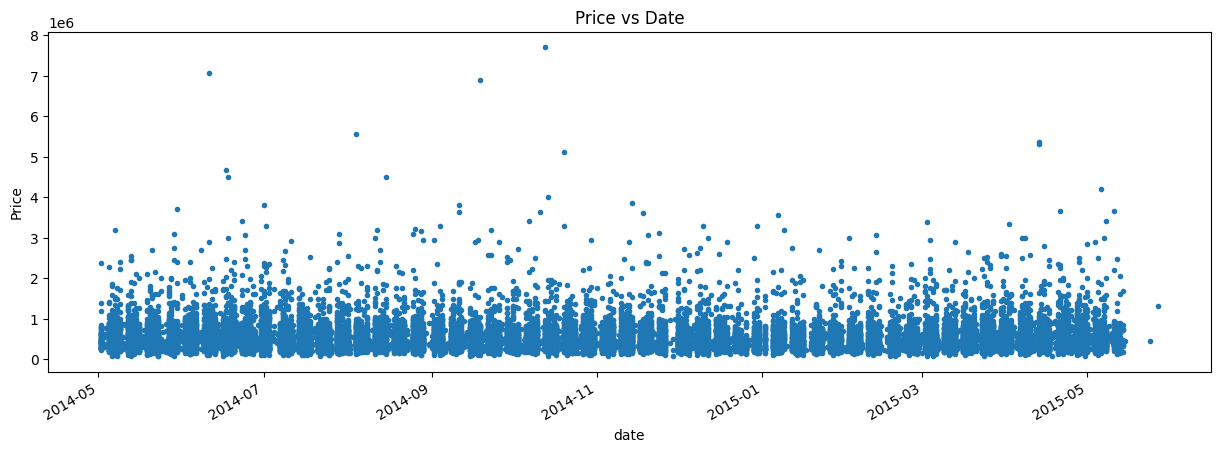

In [65]:
house_df['price'].plot(style='.', figsize=(15,5), ylabel='Price', title='Price vs Date')

### Select Train set and test set based on timeseries

In [ ]:
#all data before '2015-03-01' will be train set and test set after it
train = house_df.loc[house_df.index < '2015-03-01']
test = house_df.loc[house_df.index >= '2015-03-01']

### plot Train set and test set

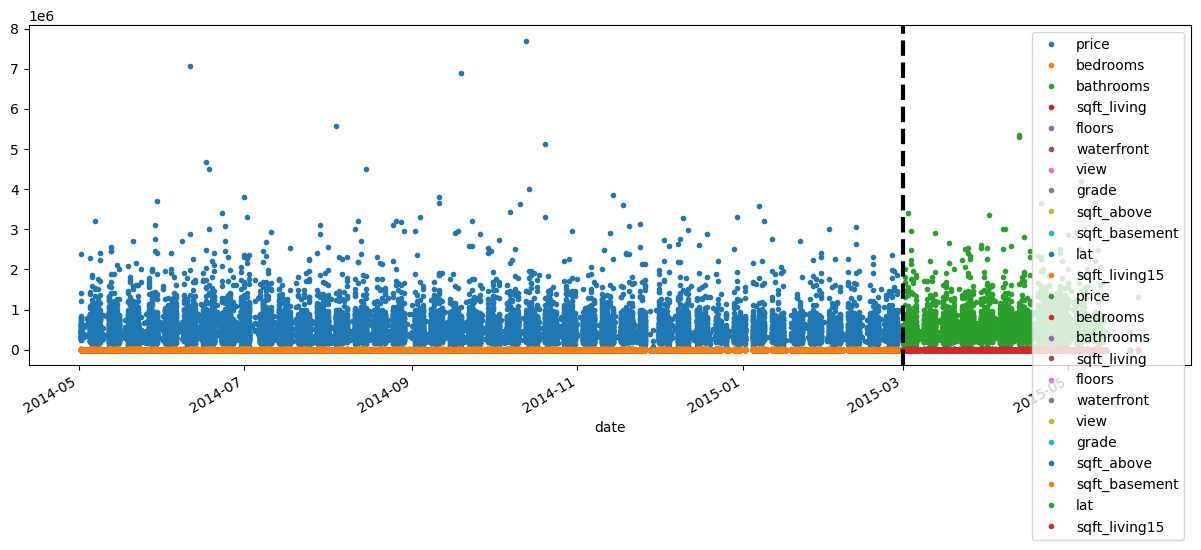

In [67]:
fig, ax = plt.subplots(figsize=(15,5))
train.plot(ax=ax, label='Training set', style='.')
test.plot(ax=ax, label='Test set', style='.')
ax.axvline('2015-03-01', color='black', ls='--', lw=3)
plt.legend()
plt.show()

#### Plot price for a week

<Axes: xlabel='date'>

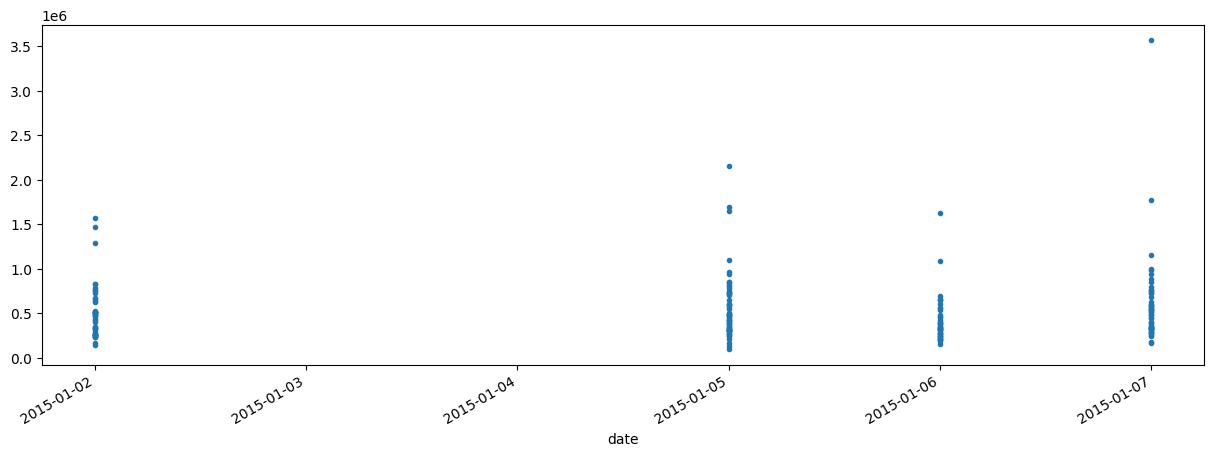

In [68]:
house_df['price'].loc[(house_df.index > '2015-01-01') & (house_df.index < '2015-01-08')].plot(style='.', figsize=(15,5))

#### Plot price for a month

<Axes: xlabel='date'>

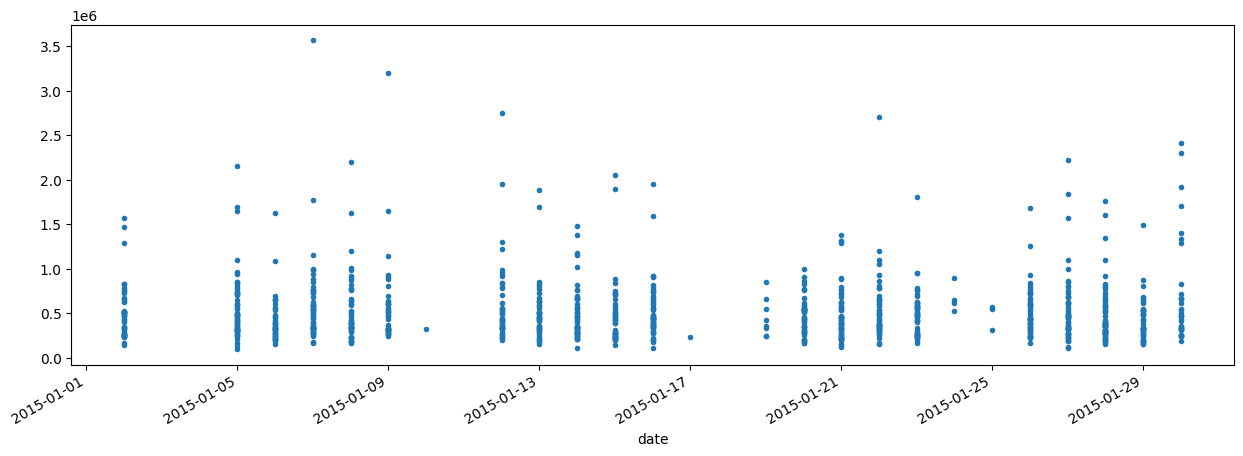

In [69]:
house_df['price'].loc[(house_df.index > '2015-01-01') & (house_df.index < '2015-01-31')].plot(style='.', figsize=(15,5))

#### Plot price for every weekend for a month

<Axes: xlabel='date'>

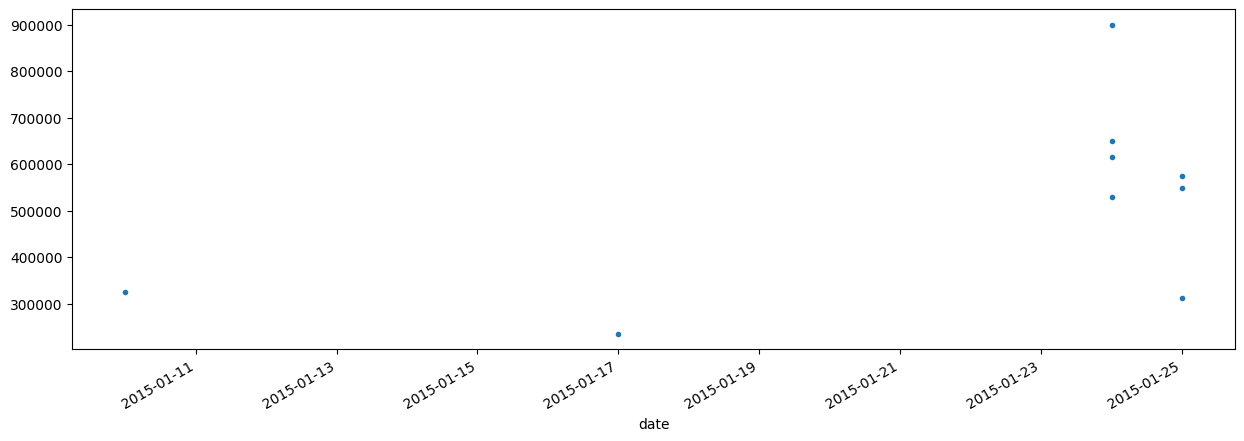

In [70]:
house_df['price'].loc[(house_df.index > '2015-01-01') & (house_df.index < '2015-01-31') & ((house_df.index.weekday == 5)|(house_df.index.weekday == 6))].plot(style='.', figsize=(15,5))

<p>We can conlude that there is weekly pattern on the demand:</p>
<ul>
<li>Sales happens during the weeday from Monday to Friday</li>
<li>Very Low sales durning the weekend </li>
</ul>

### Check for NaN values

In [71]:
house_df.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
floors           0
waterfront       0
view             0
grade            0
sqft_above       0
sqft_basement    0
lat              0
sqft_living15    0
dtype: int64

### Separate target and features and scale

In [72]:
y_train = train['price']
X_train = train.drop(['price'], axis=1)

y_test = test['price']
X_test = test.drop(['price'], axis=1)


max_train = np.array(X_train.max()).reshape(X_train.shape[1], 1)
max_test = np.array(X_test.max()).reshape(X_train.shape[1], 1)
max = np.maximum(max_train, max_test).T

min_train = np.array(X_train.min()).reshape(X_train.shape[1], 1)
min_test = np.array(X_test.min()).reshape(X_train.shape[1], 1)
min = np.minimum(min_train, min_test).T

X_train = (X_train - min) / (max - min)
X_test = (X_test - min) / (max - min)


In [73]:
X_train

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,lat,sqft_living15
date,,,,,,,,,,,
2014-10-13,0.090909,0.12500,0.067170,0.0,0.0,0.0,0.500000,0.097588,0.000000,0.571498,0.161934
2014-12-09,0.090909,0.28125,0.172075,0.4,0.0,0.0,0.500000,0.206140,0.082988,0.908959,0.222165
2015-02-25,0.060606,0.12500,0.036226,0.0,0.0,0.0,0.416667,0.052632,0.000000,0.936143,0.399415
2014-12-09,0.121212,0.37500,0.126038,0.0,0.0,0.0,0.500000,0.083333,0.188797,0.586939,0.165376
2015-02-18,0.090909,0.25000,0.104906,0.0,0.0,0.0,0.583333,0.152412,0.000000,0.741354,0.241094
...,...,...,...,...,...,...,...,...,...,...,...
2014-05-21,0.090909,0.31250,0.093585,0.8,0.0,0.0,0.583333,0.135965,0.000000,0.874055,0.194631
2015-02-23,0.121212,0.31250,0.152453,0.4,0.0,0.0,0.583333,0.221491,0.000000,0.570693,0.246257
2014-06-23,0.060606,0.09375,0.055094,0.4,0.0,0.0,0.500000,0.080044,0.000000,0.705324,0.106866


## Train Models
<ol>
<li>Multiple Linear Regression.</li>
<li>Polynomial Regression.</li>
<li>KNN Regression.</li>
<li>Non-Linear Support Vector Regression.</li>
<li>Decision Trees Regression.</li>
<li>Random Forest Regression.</li>
</ol>

### Ridge regressor

[I 2025-02-09 21:48:08,592] A new study created in memory with name: no-name-b6ee5c0a-f397-449b-a296-d87770c94867
C:\Users\mariah\AppData\Local\Temp\ipykernel_10928\2109046233.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-6, 1e2),
C:\Users\mariah\AppData\Local\Temp\ipykernel_10928\2109046233.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'tol': trial.suggest_loguniform('tol', 1e-6, 1e-2),
[I 2025-02-09 21:48:08,691] Trial 0 finished with value: 0.6588022078775659 and parameters: {'alpha': 0.0913763895402486, 'max_iter': 8376, 'tol': 3.5835598683964686e-06, 'solver': 'svd', 'fit_intercept': True}. Best is trial 0


Best Hyperparameters:  {'alpha': 0.8598299675241726, 'max_iter': 7586, 'tol': 3.6043815898639e-05, 'solver': 'auto', 'fit_intercept': True}
Best Trial Validation Score (r^2): , 65.89%
r2_score = 63.40%


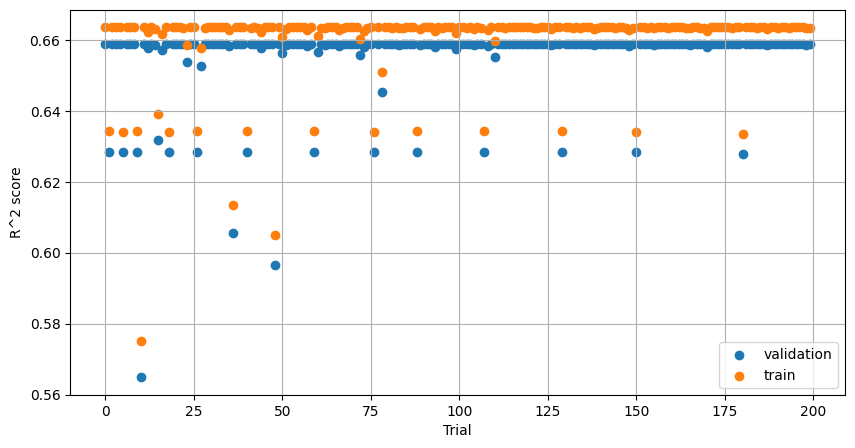

In [74]:
# List to store validation and train scores
validation_scores = []
train_scores = []
param_combinations = []

# Objective function for Optuna optimization
def objective(trial):
    # parameters for Ridge regression
    params = {
        'alpha': trial.suggest_loguniform('alpha', 1e-6, 1e2),
        'max_iter': trial.suggest_int('max_iter', 100, 10000),
        'tol': trial.suggest_loguniform('tol', 1e-6, 1e-2),
        'solver': trial.suggest_categorical('solver', ['auto', 'svd', 'cholesky', 'lsqr']),
        'fit_intercept': trial.suggest_categorical('fit_intercept', [True, False]),
    }

    # Initialize the Ridge regression model
    model = Ridge(**params)

    # Perform 5-fold cross-validation (validation score) using R^2
    cv_score = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

    # Train score (performance on the training data) using R^2
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)  # R^2 score

    # Store validation and train scores along with the hyperparameters
    validation_scores.append(cv_score.mean())  # Mean R^2 from cross-validation
    train_scores.append(train_score)
    param_combinations.append(params)  # Store the parameters for plotting later

    # Return the mean of R^2 
    return cv_score.mean()  



# Create an Optuna study and optimize the objective function
study = optuna.create_study(direction='maximize')  # Maximize R^2
study.optimize(objective, n_trials=200)

# Plot validation and train scores
validation_scores = np.array(validation_scores)
train_scores = np.array(train_scores)



plt.figure(figsize=(10,5))
plt.scatter(range(len(validation_scores)), validation_scores, label='validation')
plt.scatter(range(len(train_scores)), train_scores, label='train')
plt.xlabel('Trial')
plt.ylabel('R^2 score')
plt.grid()
plt.legend()

model = Ridge(**study.best_trial.params)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

test_score = r2_score(y_test, y_pred)


# Optionally, you can print out the best hyperparameters and model performance
print("\nBest Hyperparameters: ", study.best_trial.params)
print(f'Best Trial Validation Score (r^2): , {study.best_trial.value*100:.2f}%')
print(f'r2_score = {test_score*100:.2f}%')

### KNN regression

[I 2025-02-09 21:48:29,137] A new study created in memory with name: no-name-d879dbee-00fa-479b-964d-93ef81893c3a
[I 2025-02-09 21:48:33,852] Trial 0 finished with value: 0.7712503977924218 and parameters: {'n_neighbors': 18, 'weights': 'distance', 'algorithm': 'auto', 'leaf_size': 32, 'metric': 'manhattan'}. Best is trial 0 with value: 0.7712503977924218.
[I 2025-02-09 21:48:35,282] Trial 1 finished with value: 0.7163526637353035 and parameters: {'n_neighbors': 2, 'weights': 'uniform', 'algorithm': 'brute', 'leaf_size': 13, 'metric': 'euclidean'}. Best is trial 0 with value: 0.7712503977924218.
[I 2025-02-09 21:48:36,790] Trial 2 finished with value: 0.7619049602246155 and parameters: {'n_neighbors': 20, 'weights': 'distance', 'algorithm': 'brute', 'leaf_size': 67, 'metric': 'minkowski'}. Best is trial 0 with value: 0.7712503977924218.
[I 2025-02-09 21:48:46,066] Trial 3 finished with value: 0.7585922869076631 and parameters: {'n_neighbors': 17, 'weights': 'uniform', 'algorithm': 'bal


Best Hyperparameters:  {'n_neighbors': 6, 'weights': 'distance', 'algorithm': 'kd_tree', 'leaf_size': 47, 'metric': 'manhattan'}
Best Trial Validation Score (r^2): , 77.54%
r2_score = 75.18%


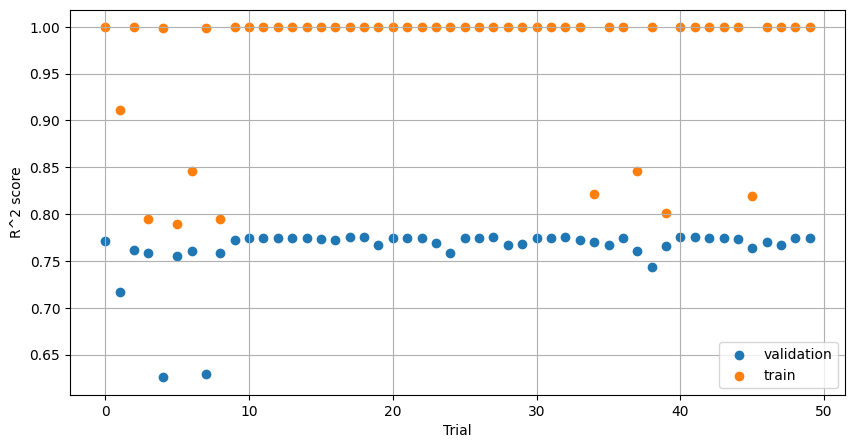

In [75]:

# List to store validation and train scores
validation_scores = []
train_scores = []
param_combinations = []

# Objective function for Optuna optimization
def objective(trial):
    # parameters for Ridge regression
    params = {
        'n_neighbors' : trial.suggest_int('n_neighbors', 1, 20),
        'weights' : trial.suggest_categorical('weights', ['uniform', 'distance']),
        'algorithm' : trial.suggest_categorical('algorithm', ['auto', 'ball_tree', 'kd_tree', 'brute']),
        'leaf_size' : trial.suggest_int('leaf_size', 10, 100),
        'metric' : trial.suggest_categorical('metric', ['minkowski', 'euclidean', 'manhattan']),
    }

    # Initialize the Ridge regression model
    model = KNeighborsRegressor(**params)

    # Perform 5-fold cross-validation (validation score) using R^2
    cv_score = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

    # Train score (performance on the training data) using R^2
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)  # R^2 score

    # Store validation and train scores along with the hyperparameters
    validation_scores.append(cv_score.mean())  # Mean R^2 from cross-validation
    train_scores.append(train_score)
    param_combinations.append(params)  # Store the parameters for plotting later

    # Return the mean of R^2 
    return cv_score.mean()  



# Create an Optuna study and optimize the objective function
study = optuna.create_study(direction='maximize')  # Maximize R^2
study.optimize(objective, n_trials=50)

# Plot validation and train scores
validation_scores = np.array(validation_scores)
train_scores = np.array(train_scores)


plt.figure(figsize=(10,5))
plt.scatter(range(len(validation_scores)), validation_scores, label='validation')
plt.scatter(range(len(train_scores)), train_scores, label='train')
plt.xlabel('Trial')
plt.ylabel('R^2 score')
plt.grid()
plt.legend()

model = KNeighborsRegressor(**study.best_trial.params)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

test_score = r2_score(y_test, y_pred)


# Optionally, you can print out the best hyperparameters and model performance
print("\nBest Hyperparameters: ", study.best_trial.params)
print(f'Best Trial Validation Score (r^2): , {study.best_trial.value*100:.2f}%')
print(f'r2_score = {test_score*100:.2f}%')

### Decision Tree Regressor

[I 2025-02-09 21:52:29,856] A new study created in memory with name: no-name-7e8ac09d-bf73-454e-a58c-36823e7b89f5
[I 2025-02-09 21:52:29,924] Trial 0 finished with value: 0.10107685634673902 and parameters: {'max_depth': 4, 'min_samples_split': 12, 'min_samples_leaf': 23, 'max_features': 0.10992964319861609, 'splitter': 'random'}. Best is trial 0 with value: 0.10107685634673902.
[I 2025-02-09 21:52:29,981] Trial 1 finished with value: 0.14215007197360582 and parameters: {'max_depth': 5, 'min_samples_split': 26, 'min_samples_leaf': 17, 'max_features': 0.04600783578290573, 'splitter': 'random'}. Best is trial 1 with value: 0.14215007197360582.
[I 2025-02-09 21:52:30,312] Trial 2 finished with value: 0.7398139446219142 and parameters: {'max_depth': 10, 'min_samples_split': 14, 'min_samples_leaf': 5, 'max_features': 0.8622064004164934, 'splitter': 'best'}. Best is trial 2 with value: 0.7398139446219142.
[I 2025-02-09 21:52:30,377] Trial 3 finished with value: 0.4873712651201365 and paramet


Best Hyperparameters:  {'max_depth': 13, 'min_samples_split': 13, 'min_samples_leaf': 7, 'max_features': 0.9677095650875747, 'splitter': 'best'}
Best Trial Validation Score (r^2): , 74.09%
r2_score = 75.39%


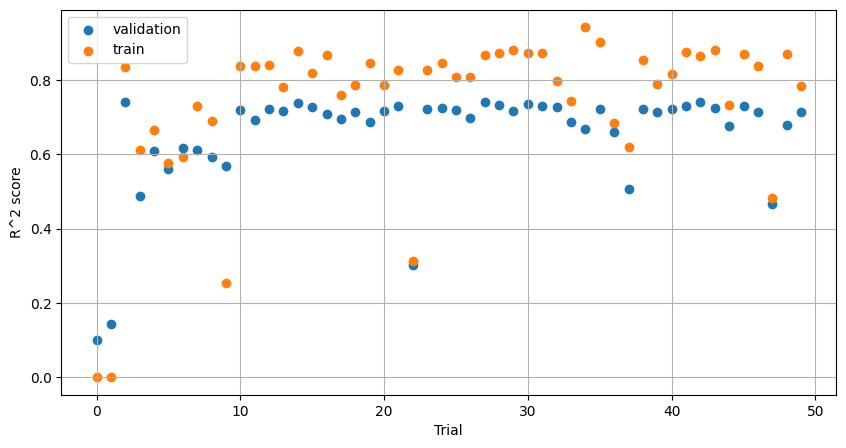

In [76]:
# List to store validation and train scores
validation_scores = []
train_scores = []
param_combinations = []

# Objective function for Optuna optimization
def objective(trial):
    # parameters for Ridge regression
    params = {
        'max_depth' : trial.suggest_int('max_depth', 1, 30),
        'min_samples_split' : trial.suggest_int('min_samples_split', 2, 30),
        'min_samples_leaf' : trial.suggest_int('min_samples_leaf', 1, 30),
        'max_features' : trial.suggest_float('max_features', 0.001, 1),
        'splitter' : trial.suggest_categorical('splitter', ['best', 'random']),
    }

    # Initialize the Ridge regression model
    model = DecisionTreeRegressor(**params)

    # Perform 5-fold cross-validation (validation score) using R^2
    cv_score = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

    # Train score (performance on the training data) using R^2
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)  # R^2 score

    # Store validation and train scores along with the hyperparameters
    validation_scores.append(cv_score.mean())  # Mean R^2 from cross-validation
    train_scores.append(train_score)
    param_combinations.append(params)  # Store the parameters for plotting later

    # Return the mean of R^2 
    return cv_score.mean()  



# Create an Optuna study and optimize the objective function
study = optuna.create_study(direction='maximize')  # Maximize R^2
study.optimize(objective, n_trials=50)

# Plot validation and train scores
validation_scores = np.array(validation_scores)
train_scores = np.array(train_scores)


plt.figure(figsize=(10,5))
plt.scatter(range(len(validation_scores)), validation_scores, label='validation')
plt.scatter(range(len(train_scores)), train_scores, label='train')
plt.xlabel('Trial')
plt.ylabel('R^2 score')
plt.grid()
plt.legend()

model = DecisionTreeRegressor(**study.best_trial.params)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

test_score = r2_score(y_test, y_pred)


# Optionally, you can print out the best hyperparameters and model performance
print("\nBest Hyperparameters: ", study.best_trial.params)
print(f'Best Trial Validation Score (r^2): , {study.best_trial.value*100:.2f}%')
print(f'r2_score = {test_score*100:.2f}%')

### Random Forest Regression

[I 2025-02-09 21:52:45,199] A new study created in memory with name: no-name-dfdb9ab3-ab12-475f-9719-55c8f39be125
[I 2025-02-09 21:52:46,725] Trial 0 finished with value: 0.37988900590931135 and parameters: {'n_estimators': 41, 'max_depth': 1, 'min_samples_split': 16, 'min_samples_leaf': 17, 'max_features': 0.9564363062796345}. Best is trial 0 with value: 0.37988900590931135.
[I 2025-02-09 21:53:02,242] Trial 1 finished with value: 0.7795072370425287 and parameters: {'n_estimators': 80, 'max_depth': 9, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_features': 0.8733313675864545}. Best is trial 1 with value: 0.7795072370425287.
[I 2025-02-09 21:53:10,942] Trial 2 finished with value: 0.7485734739694585 and parameters: {'n_estimators': 93, 'max_depth': 13, 'min_samples_split': 12, 'min_samples_leaf': 18, 'max_features': 0.34424772584421026}. Best is trial 1 with value: 0.7795072370425287.
[I 2025-02-09 21:53:11,291] Trial 3 finished with value: 0.36862948523432737 and parameters: {'


Best Hyperparameters:  {'n_estimators': 97, 'max_depth': 17, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 0.8975752479806036}
Best Trial Validation Score (r^2): , 80.89%
r2_score = 80.34%


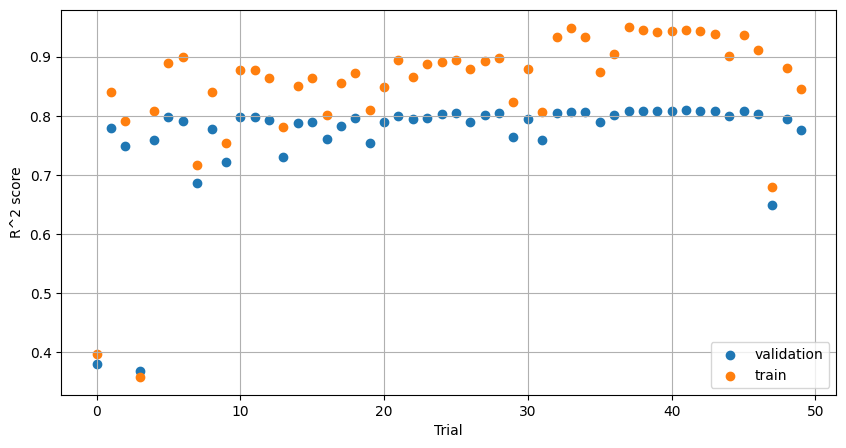

In [77]:
# List to store validation and train scores
validation_scores = []
train_scores = []
param_combinations = []

# Objective function for Optuna optimization
def objective(trial):
    # parameters for Ridge regression
    params = {
        'n_estimators' : trial.suggest_int('n_estimators', 10, 200),
        'max_depth' : trial.suggest_int('max_depth', 1, 20),
        'min_samples_split' : trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf' : trial.suggest_int('min_samples_leaf', 1, 20),
        'max_features' : trial.suggest_float('max_features', 0.1, 1)
     }

    # Initialize the Ridge regression model
    model = RandomForestRegressor(**params)

    # Perform 5-fold cross-validation (validation score) using R^2
    cv_score = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

    # Train score (performance on the training data) using R^2
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)  # R^2 score

    # Store validation and train scores along with the hyperparameters
    validation_scores.append(cv_score.mean())  # Mean R^2 from cross-validation
    train_scores.append(train_score)
    param_combinations.append(params)  # Store the parameters for plotting later

    # Return the mean of R^2 
    return cv_score.mean()  


# Create an Optuna study and optimize the objective function
study = optuna.create_study(direction='maximize')  # Maximize R^2
study.optimize(objective, n_trials=50)

# Plot validation and train scores
validation_scores = np.array(validation_scores)
train_scores = np.array(train_scores)


plt.figure(figsize=(10,5))
plt.scatter(range(len(validation_scores)), validation_scores, label='validation')
plt.scatter(range(len(train_scores)), train_scores, label='train')
plt.xlabel('Trial')
plt.ylabel('R^2 score')
plt.grid()
plt.legend()

model = RandomForestRegressor(**study.best_trial.params)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

test_score = r2_score(y_test, y_pred)


# Optionally, you can print out the best hyperparameters and model performance
print("\nBest Hyperparameters: ", study.best_trial.params)
print(f'Best Trial Validation Score (r^2): , {study.best_trial.value*100:.2f}%')
print(f'r2_score = {test_score*100:.2f}%')

### SVR Non-Linear

[I 2025-02-09 22:14:20,781] A new study created in memory with name: no-name-35a8ce7a-19d1-481f-b7e6-92ded58b909f
C:\Users\mariah\AppData\Local\Temp\ipykernel_10928\2757166661.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C' : trial.suggest_loguniform('C', 1e-3, 1e3),
e:\AI_ML_ROBOGARDEN\LABORATORY\.venv\Lib\site-packages\sklearn\svm\_base.py:304: ConvergenceWarning: Solver terminated early (max_iter=8509).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
e:\AI_ML_ROBOGARDEN\LABORATORY\.venv\Lib\site-packages\sklearn\svm\_base.py:304: ConvergenceWarning: Solver terminated early (max_iter=8509).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
e:\AI_ML_ROBOGARDEN\LABORATORY\.venv\Lib\site-packages\sklearn\svm\_base.py:304: ConvergenceWarning:


Best Hyperparameters:  {'C': 998.0150459195629, 'max_iter': 9873, 'kernel': 'poly', 'gamma': 'scale'}
Best Trial Validation Score (r^2): , 70.79%
r2_score = 67.20%


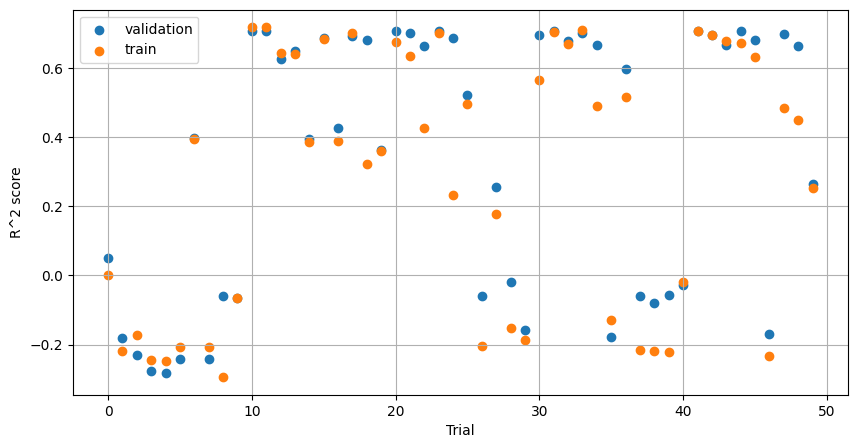

In [78]:
# List to store validation and train scores
validation_scores = []
train_scores = []
param_combinations = []

# Objective function for Optuna optimization
def objective(trial):
    # parameters for Ridge regression
    params = {
        'C' : trial.suggest_loguniform('C', 1e-3, 1e3),
        'max_iter' : trial.suggest_int('max_iter', 5000, 10000),
        'kernel' : trial.suggest_categorical('kernel', ['poly', 'rbf']),
        'gamma' : trial.suggest_categorical('gamma', ['scale', 'auto']),
    }

    # Initialize the Ridge regression model
    model = SVR(**params)

    # Perform 5-fold cross-validation (validation score) using R^2
    cv_score = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

    # Train score (performance on the training data) using R^2
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)  # R^2 score

    # Store validation and train scores along with the hyperparameters
    validation_scores.append(cv_score.mean())  # Mean R^2 from cross-validation
    train_scores.append(train_score)
    param_combinations.append(params)  # Store the parameters for plotting later

    # Return the mean of R^2 
    return cv_score.mean()  


# Create an Optuna study and optimize the objective function
study = optuna.create_study(direction='maximize')  # Maximize R^2
study.optimize(objective, n_trials=50)

# Plot validation and train scores
validation_scores = np.array(validation_scores)
train_scores = np.array(train_scores)


plt.figure(figsize=(10,5))
plt.scatter(range(len(validation_scores)), validation_scores, label='validation')
plt.scatter(range(len(train_scores)), train_scores, label='train')
plt.xlabel('Trial')
plt.ylabel('R^2 score')
plt.grid()
plt.legend()

model = SVR(**study.best_trial.params)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

test_score = r2_score(y_test, y_pred)


# Optionally, you can print out the best hyperparameters and model performance
print("\nBest Hyperparameters: ", study.best_trial.params)
print(f'Best Trial Validation Score (r^2): , {study.best_trial.value*100:.2f}%')
print(f'r2_score = {test_score*100:.2f}%')

## Conclusion

<p>We can conclude that random forest give us the best performance with:</p>
<ul>
<li>Best Hyperparameters:  {'n_estimators': 97, 'max_depth': 17, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 0.8975752479806036}</li>
<li>Best Trial Validation Score (r^2): , 80.89%</li>
<li>test r2_score = 80.34%</li>
</ul>